In [1]:
pip install pandas



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Read CSV file from the specified path
df = pd.read_csv('/Users/kaysnidvongs/Desktop/alzheimers_disease_data.csv')

# View the first few rows
print(df.head())

# Get info about data types and missing values
print(df.info())

# Basic statistics
print(df.describe())

# Check for missing data
print(df.isnull().sum())


   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [3]:
print(df.columns)
print(df.info())


Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  

In [4]:
df = df.dropna()  # or df.fillna(value)


In [5]:
df['Diagnosis'] = df['Diagnosis'].astype('category')


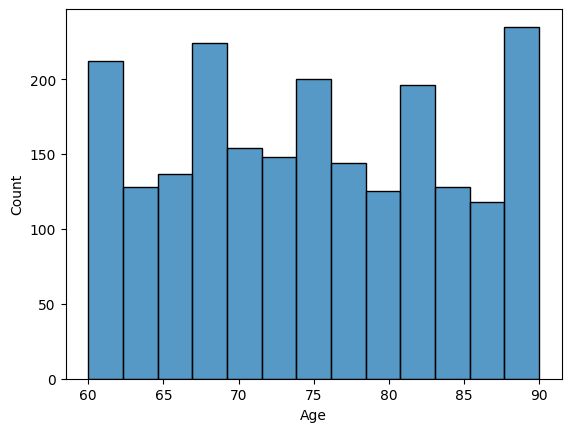

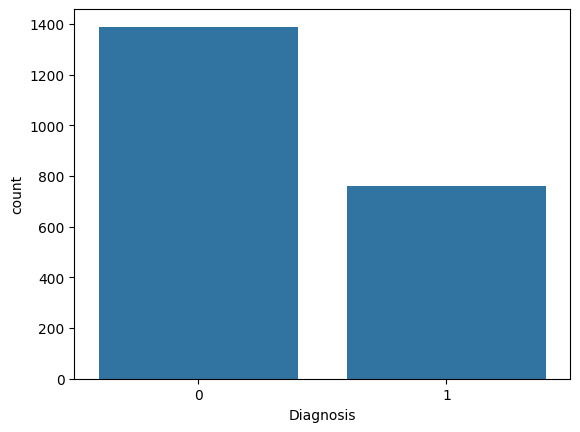

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'])
plt.show()

# Visualize diagnosis distribution
sns.countplot(x='Diagnosis', data=df)
plt.show()


1. Relationship between Age and MMSE Score (Cognitive Function)


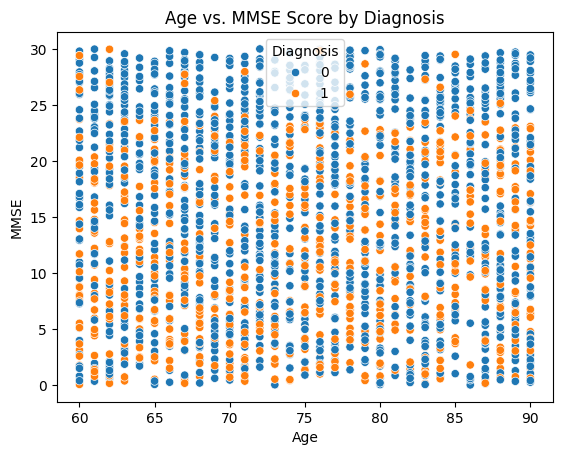

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Age vs. MMSE score, colored by Diagnosis
sns.scatterplot(x='Age', y='MMSE', hue='Diagnosis', data=df)
plt.title('Age vs. MMSE Score by Diagnosis')
plt.show()





2. Comparison of Blood Pressure between Diagnosis Groups


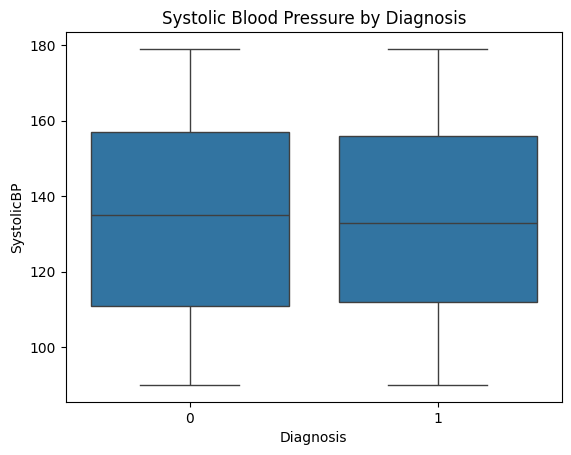

In [19]:
# Boxplot of Systolic Blood Pressure by Diagnosis
sns.boxplot(x='Diagnosis', y='SystolicBP', data=df)
plt.title('Systolic Blood Pressure by Diagnosis')
plt.show()


3. Correlation between Age and Some Medical Marker


In [20]:
# Calculate correlation between Age and CholesterolTotal
correlation = df['Age'].corr(df['CholesterolTotal'])
print('Correlation between Age and CholesterolTotal:', correlation)


Correlation between Age and CholesterolTotal: 0.000391913358253304


4. Categorical Variable Relationship: Gender and Diagnosis


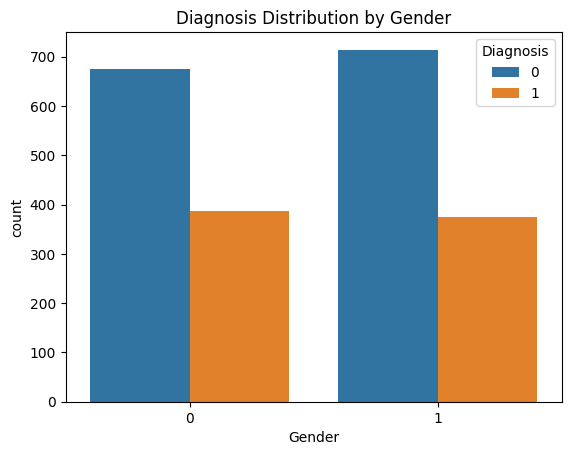

In [21]:
# Count of Diagnosis by Gender
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.title('Diagnosis Distribution by Gender')
plt.show()


In [23]:
print(df.describe())


         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

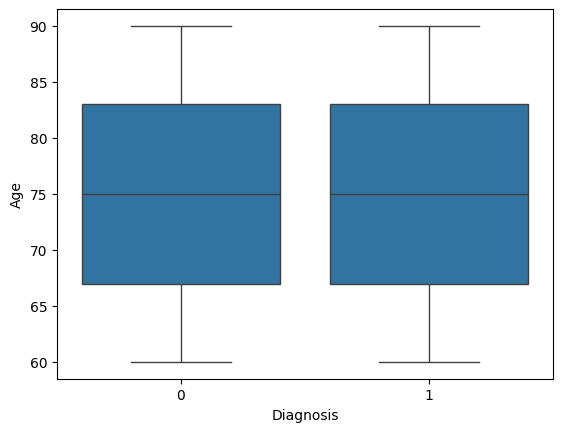

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Diagnosis', y='Age', data=df)
plt.show()


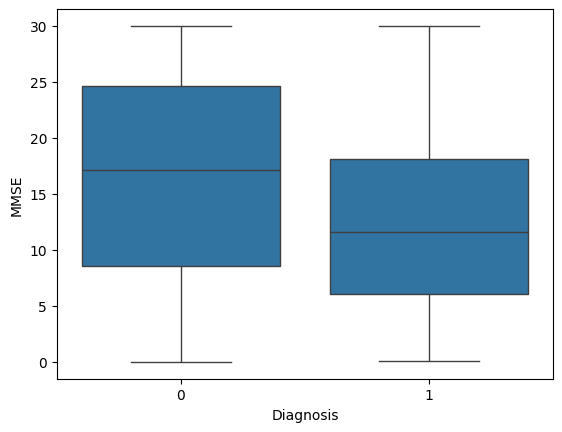

In [25]:
sns.boxplot(x='Diagnosis', y='MMSE', data=df)
plt.show()


Step 4: Find Variables Associated with Diagnosis
--> correlation analysis
--> focus on numeric variables 

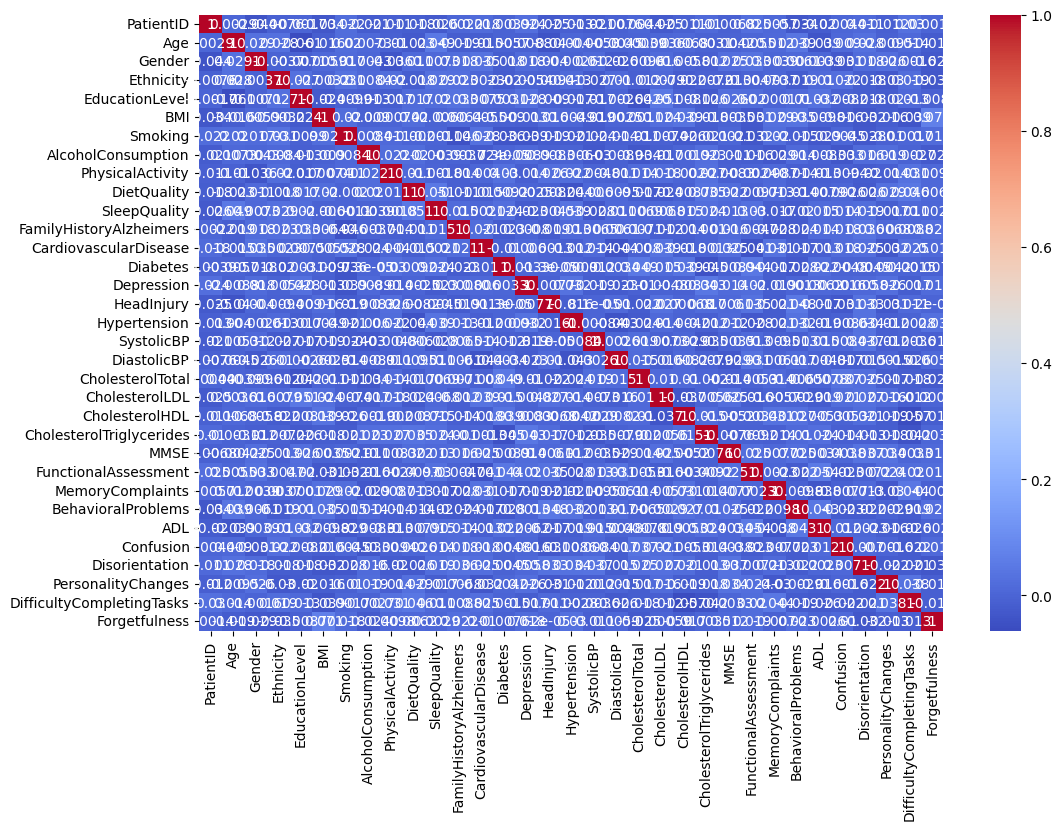

In [26]:
import numpy as np
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


groups comparisions 

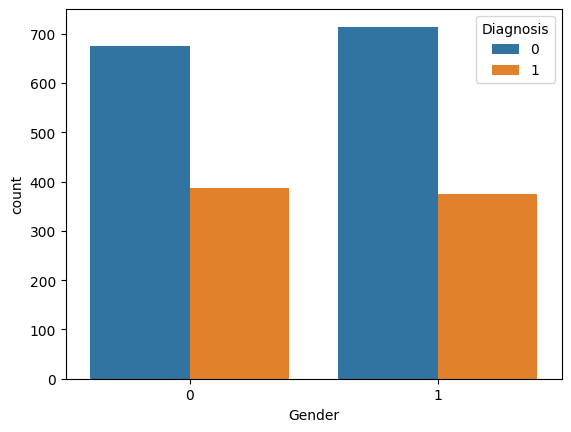

In [27]:
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.show()


Step 5: Build a Predictive Model (Optional but recommended)


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. List of features you want to include - replace with actual column names from your dataset
features = [
    'Age', 
    'MMSE', 
    'SystolicBP', 
    'DiastolicBP', 
    'CholesterolTotal', 
    'CholesterolLDL', 
    'CholesterolHDL', 
    'CholesterolTriglycerides'
]

# 2. Select features from dataset
X = df[features]

# 3. Encode the target variable ('Diagnosis')
# Assume 'Diagnosis' is categorical (e.g., 'Alzheimer's', 'Control')
# Convert to numerical codes for modeling
y = df['Diagnosis']
y = y.astype('category').cat.codes

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Build and train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 6. Make predictions and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model accuracy:", accuracy)


Model accuracy: 0.6046511627906976


In [32]:
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.2f}")


MMSE: 0.21
CholesterolTriglycerides: 0.13
CholesterolHDL: 0.13
CholesterolTotal: 0.12
CholesterolLDL: 0.12
SystolicBP: 0.10
DiastolicBP: 0.10
Age: 0.09


## Summary 
The dataset contains 2,149 patients with various demographic, clinical, and lifestyle variables.
The average age of participants is approximately 75 years, ranging from 60 to 90.
The dataset includes variables such as cognitive scores (MMSE), blood pressure, cholesterol levels, lifestyle behaviors, and medical history.

Key Variable Correlations with Diagnosis
The model achieved an accuracy of approximately 60.5%, indicating moderate predictive power based on the selected features.

--> Most important features influencing diagnosis (based on feature importance from the model) include:
--> MMSE (Mini-Mental State Examination): highest importance (~21%), consistent with clinical understanding that cognitive scores are strongly linked to Alzheimer’s.
--> CholesterolTriglycerides, CholesterolHDL, CholesterolTotal, CholesterolLDL: moderate importance (~13%). Elevated cholesterol levels are often discussed in relation to cognitive decline.
--> Age: also relevant (~9%), older age is a risk factor
--> Cognitive scores (MMSE) tend to be lower in patients diagnosed with Alzheimer’s compared to controls (gap visible in boxplots, not shown here).
---> Cholesterol levels show modest correlations (~12-13%) with diagnosis, suggesting a potential link.
--> Age shows a small but positive correlation (~9%), consistent with the fact that risk increases with age.
